### PORT 1a - energy average depositions

looking at loading in all the relevant signal events and scooping out the signal events. lets make a script

In [1]:
import sys,os,os.path
sys.path.append("../../") # if you move files around, you need to adjust this!
sys.path.append(os.path.expanduser('~/code/eol_hsrl_python'))
os.environ['ICTDIR']='/home/e78368jw/Documents/NEXT_CODE/IC'

#%load_ext autoreload
#%autoreload 2
#%matplotlib notebook


#%matplotlib widget
#import ipympl

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'
rcParams['figure.figsize'] = [10, 8]
rcParams['font.size'] = 22

import pandas as pd
import numpy  as np
import tables as tb

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as clrs

import IC.invisible_cities.core.core_functions                   as     coref
import IC.invisible_cities.io.dst_io                           as     dstio

from IC.invisible_cities.cities                 import beersheba as beerfun

from IC.invisible_cities.evm.event_model                          import HitCollection

from IC.invisible_cities.database.load_db       import DataSiPM

from IC.invisible_cities.evm.event_model        import Cluster, Hit
from IC.invisible_cities.types.ic_types         import xy
from IC.invisible_cities.reco.paolina_functions import voxelize_hits

from IC.invisible_cities.evm.event_model        import HitEnergy
from IC.invisible_cities.cities.beersheba          import DeconvolutionMode
from IC.invisible_cities.cities.beersheba          import CutType

from IC.invisible_cities.reco import hits_functions as hif

from IC.invisible_cities.reco.deconv_functions import deconvolve
from IC.invisible_cities.reco.deconv_functions import deconvolution_input
from IC.invisible_cities.reco.deconv_functions import InterpolationMethod

import IC.invisible_cities.io.mcinfo_io as mcio

from collections import defaultdict

import matplotlib.cm as cm
from matplotlib.colors import Normalize

from tqdm import tqdm


In [2]:
 # lets load in the post 1a tracks
#signals = np.load('port_1a_signal_evts.npy')
signals = np.load('port_1a_isaura_lost_evts.npy')
signals = signals*2
print(np.sort(signals))

[    198     312     484     510   20038   40456   40530   60030   80568
  100528  120380  120514  160412  180386  220042  220378  240038  240256
  240310  240542  260384  280184  280464  280508  300084  300114  300312
  300458  300612  300620  300728  320202  320476  320562  340338  360090
  360598  380028  380406  400568  460186  460526  460578  480418  480434
  480568  500288  500436  520060  520270  520604  540074  540212  560190
  580356  600100  620312  620434  640036  640092  640168  640236  660092
  660414  660524  660566  700172  700258  700314  700404  700484  720362
  720640  740332  740342  740390  760256  760526  760680  780056  780176
  780546  820628  840436  860076  860494  860524  900220  900410  900420
  900422  920090  920264  940446  960194  960312  960480  980040 1000162
 1020128 1020502 1040084 1040412 1040582 1060048 1060238 1080002 1080120
 1100230 1120000 1120392 1140114 1140350 1160212 1160240 1180062 1180460
 1200018 1200102 1200200 1200574 1220090 1220212 12

In [18]:
def collect_signal_events(folder_path, event_numbers):

    file_names = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) and f.endswith('.h5')]
    
    i = 0

    for file in tqdm(file_names):

        file_path = folder_path + file
        df = dstio.load_dst(file_path, 'DECO', 'Events')
        if (i == 0):
            signal_df = df[df['event'].isin(event_numbers)]
            i += 1
        else:
            signal_df = signal_df.append(df[df['event'].isin(event_numbers)], ignore_index = True)
        
    return signal_df
            

In [19]:
signal_df = collect_signal_events('testing_data/beersheba/', signals)

100%|██████████| 300/300 [04:22<00:00,  1.14it/s]


In [5]:
display(signal_df)

,event,npeak,X,Y,Z,E,Xpeak,Ypeak,time,nsipm,Xrms,Yrms
0,4080350,0.0,222.675,-366.325,207.998634,0.000004,259.265537,-344.763975,4.080351e+12,0,0,0
1,4080350,0.0,222.675,-365.325,207.998634,0.000005,259.265537,-344.763975,4.080351e+12,0,0,0
2,4080350,0.0,222.675,-364.325,207.998634,0.000004,259.265537,-344.763975,4.080351e+12,0,0,0
3,4080350,0.0,223.675,-367.325,207.998634,0.000005,259.265537,-344.763975,4.080351e+12,0,0,0
4,4080350,0.0,223.675,-366.325,207.998634,0.000008,259.265537,-344.763975,4.080351e+12,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6938113,2620390,1.0,-97.325,384.675,1040.695359,0.000070,-159.053739,401.457677,2.620391e+12,0,0,0
6938114,2620390,1.0,-97.325,385.675,1040.695359,0.000065,-159.053739,401.457677,2.620391e+12,0,0,0
6938115,2620390,1.0,-96.325,383.675,1040.695359,0.000063,-159.053739,401.457677,2.620391e+12,0,0,0
6938116,2620390,1.0,-96.325,384.675,1040.695359,0.000064,-159.053739,401.457677,2.620391e+12,0,0,0


In [20]:
print(len(np.unique(signal_df.event.to_numpy())))

592


In [21]:
df_total_E = []
for event, df in signal_df.groupby("event"):
    print("Event: {}\n Total energy: {} MeV".format(event, df.E.sum()))
    df_total_E.append(df.E.sum())

Event: 198
 Total energy: 1.592416654051363 MeV
Event: 312
 Total energy: 0.6193089494120337 MeV
Event: 484
 Total energy: 1.8202707241806937 MeV
Event: 510
 Total energy: 0.4366628120220016 MeV
Event: 20038
 Total energy: 1.3988522375023524 MeV
Event: 40456
 Total energy: 1.5957299242311251 MeV
Event: 40530
 Total energy: 1.5923867899055164 MeV
Event: 60030
 Total energy: 0.9032641166473636 MeV
Event: 80568
 Total energy: 1.7990569544200168 MeV
Event: 100528
 Total energy: 1.5929032996803079 MeV
Event: 120380
 Total energy: 0.5833673559701453 MeV
Event: 120514
 Total energy: 1.2669086416695388 MeV
Event: 160412
 Total energy: 0.5902789874065749 MeV
Event: 180386
 Total energy: 1.620916435691006 MeV
Event: 220042
 Total energy: 2.081993582630068 MeV
Event: 220378
 Total energy: 2.388846711279458 MeV
Event: 240038
 Total energy: 1.6443726696898608 MeV
Event: 240256
 Total energy: 1.0854645877314 MeV
Event: 240310
 Total energy: 1.6890087058086878 MeV
Event: 240542
 Total energy: 1.48071

Text(0.5, 1.0, 'Lost Signal events total Energy per event')

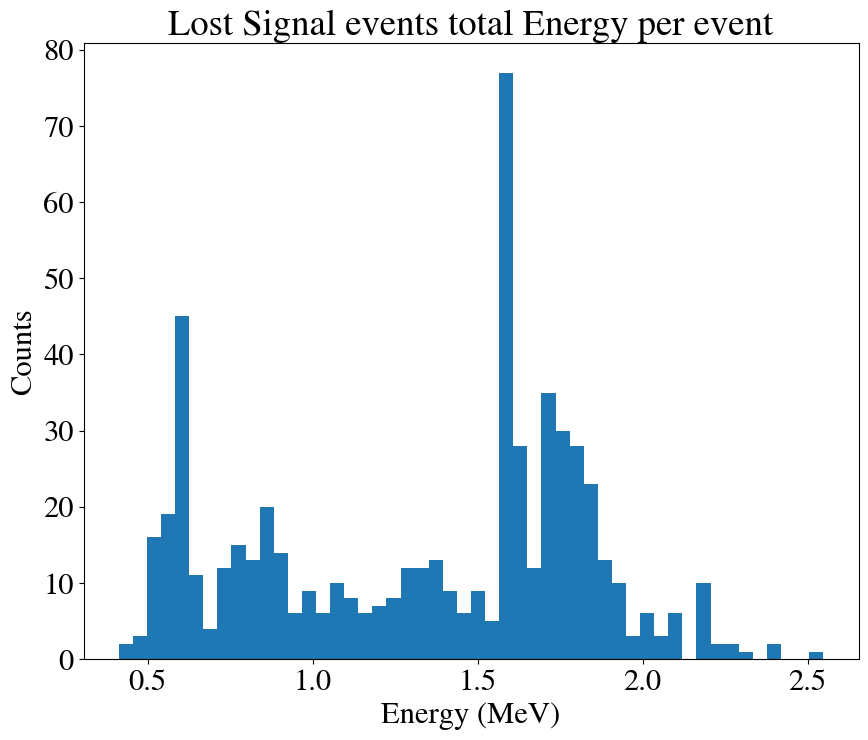

In [22]:
plt.hist(df_total_E, bins = 50)
plt.xlabel("Energy (MeV)")
plt.ylabel("Counts")
plt.title("Lost Signal events total Energy per event")

In [23]:
df_total_E = np.array(df_total_E)

q = np.where(np.logical_and(df_total_E>1.5, df_total_E<1.7))
print(len(q[0]))


131
